# Introduction to Regression with Neural Networks in TenorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Creating data to view and fit

In [3]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

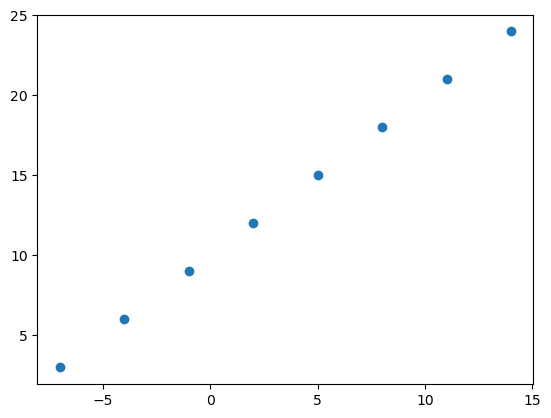

In [4]:
plt.scatter(X, y);

## Input and output shapes

In [5]:
# create a demo tensor 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info.shape, house_price.shape

2023-11-23 16:13:32.092797: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-11-23 16:13:32.092819: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-11-23 16:13:32.092823: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-11-23 16:13:32.092852: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-23 16:13:32.092867: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([3]), TensorShape([1]))

In [6]:
X.shape, y.shape

((8,), (8,))

**Code Breaks for tensorflow 2.7+**
#### OLD
### Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+

#### New
### Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

In [7]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)

In [8]:
# When no shape, then scalar
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. create a model - input, output, hidden layers
2. compiling a model - loss function, optimizer, evaluation metrics
3. fitting the model

In [9]:
X = tf.expand_dims(X, axis=-1)

In [ ]:
#tf.random.set_seed(42)
# 1. Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = "Adam", 
              metrics=['mae'])

# 3. Fitting the model
model.fit(X, y, epochs = 5)

Epoch 1/5
